<a href="https://colab.research.google.com/github/erika0915/artificial-intelligence/blob/main/mlp/01_%EA%B8%B0%EB%B3%B8MLP%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

기본 MLP
- 은닉층 1개, 유닛 수 32개
- 활성화 함수 : Sigmoid
- 옵티마이저 : SGD(lr = 0.1)

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.07MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 159kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.56MB/s]


Epoch [1/10]  Loss: 0.5915
Epoch [2/10]  Loss: 0.2749
Epoch [3/10]  Loss: 0.2269
Epoch [4/10]  Loss: 0.1994
Epoch [5/10]  Loss: 0.1801
Epoch [6/10]  Loss: 0.1654
Epoch [7/10]  Loss: 0.1537
Epoch [8/10]  Loss: 0.1444
Epoch [9/10]  Loss: 0.1367
Epoch [10/10]  Loss: 0.1296

총 학습 시간: 140.38초
Test Loss: 0.1444 | Accuracy: 95.85%


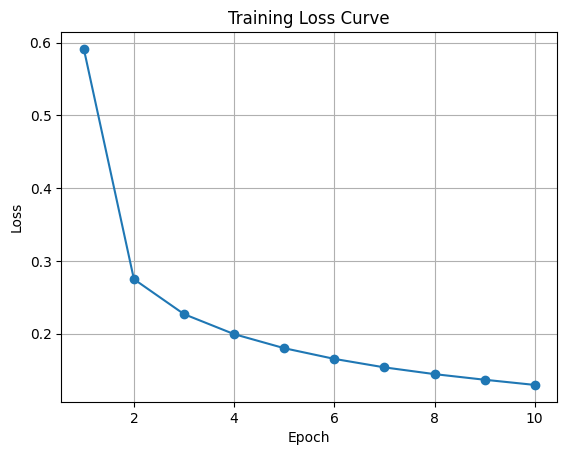

In [1]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. 데이터 전처리 & 로더 구축
transform = transforms.Compose([
    transforms.ToTensor(),                      # 이미지를 Tensor로 변환
    transforms.Normalize((0.1307,), (0.3081,))  # 픽셀 정규화
])

# 훈련 데이터셋 다운로드 및 로딩
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# 테스트 데이터셋 다운로드 및 로딩
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=False)


# 2. 2‑layer MLP 모델 정의
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()           # (B, 1, 28, 28) → (B, 784)
        self.fc1 = nn.Linear(28*28, 32)       # 은닉층 32 units
        self.act = nn.Sigmoid()               # 시그모이드 활성화
        self.fc2 = nn.Linear(32, 10)          # 출력층 (10개 클래스)

    def forward(self, x):
        x = self.flatten(x)
        x = self.act(self.fc1(x))
        x = self.fc2(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MLP().to(device)

# 3. 학습 설정
criterion = nn.CrossEntropyLoss()                        # 다중분류용 손실
optimizer = optim.SGD(model.parameters(), lr=0.1)        # SGD, lr=0.1
epochs = 10
loss_history = []
start_time = time.time()

# 4. 학습
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)              # 순전파
        loss = criterion(outputs, labels)    # 손실 계산
        loss.backward()                      # 역전파
        optimizer.step()                     # 가중치 업데이트

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(trainloader.dataset)
    loss_history.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{epochs}]  Loss: {epoch_loss:.4f}')

total_time = time.time() - start_time
print(f'\n총 학습 시간: {total_time:.2f}초')

# 5. 테스트 평가
model.eval()
test_loss, correct = 0.0, 0

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        test_loss += criterion(outputs, labels).item() * images.size(0)
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()

test_loss /= len(testloader.dataset)
accuracy  = correct / len(testloader.dataset) * 100
print(f'Test Loss: {test_loss:.4f} | Accuracy: {accuracy:.2f}%')

# 6. 시각화
plt.figure()
plt.plot(range(1, epochs+1), loss_history, marker='o')
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()